***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date: 10/22}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{\nu_i} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{\nu_i}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit = Fitting('KMC_NonDynamic_Data_iCovg_iRates.csv','Atomic.csv','Stoich.csv','Param.csv',Input_Type='iCovg_iRates') 
fit.set_rxnconditions(Pr=[(1.0e-4*1.0e-5), (1.0e-4*0.1), 0]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax #Note order corresponds to stoich matrix P orders)
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 0.5

Mass is conserved. 

CPU times: user 49 ms, sys: 5.23 ms, total: 54.2 ms
Wall time: 52.4 ms


In [3]:
fit.P

[1e-09, 1e-05, 0]

In [4]:
#a = [1e-3,1e-2,1e-4,1e5,1e5,1e-2,1e3,1e4]
#Fitting for Model 1: (without CD) #using curve_fit
#fit.k = a

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf

 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [4.68553702e+05 1.78301201e+02 2.04270823e+04 1.28985489e+05
 9.37432364e+04 2.47398369e-01 7.59443539e+04 5.00000000e+02]


<IPython.core.display.Javascript object>


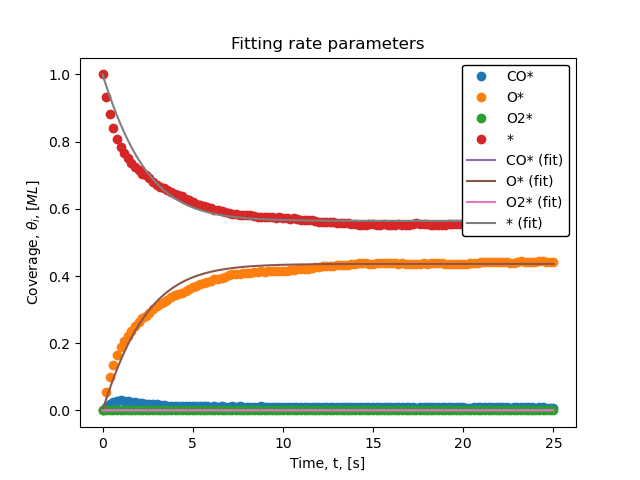

CPU times: user 5min 7s, sys: 4.41 s, total: 5min 12s
Wall time: 4min 42s


In [5]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
t1,covg1,fits1 = fit.fitting_rate_param(option='cf',maxfev=1e6,xtol=1e-8,ftol=1e-8,plot=True) 
kfit1 = fit.fitted_k

In [6]:
fit.k

array([5.81e-02, 6.65e-09, 7.69e+02, 1.15e+05, 2.60e+05, 2.14e-02,
       1.35e+00, 5.00e+02])

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# TRYING OUT ML K Fitting

In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit = Fitting('KMC_NonDynamic_Data_iCovg_iRates.csv','Atomic.csv','Stoich.csv','Param.csv',Input_Type='iCovg_iRates') 
fit.set_rxnconditions(Pr=[(1.0e-4*1.0e-5), (1.0e-4*0.1), 0]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax #Note order corresponds to stoich matrix P orders)
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 0.5

Mass is conserved. 

CPU times: user 22.4 ms, sys: 1.84 ms, total: 24.2 ms
Wall time: 26.1 ms


50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: MLPRegressor | (FeedForward) Neural Network:

Number of Hidden layer nodes per layer :  128
Number of Hidden layers:  4
The Model Mean Squared Errors: 
 [1.89315791e+04 2.84348892e+01 9.29081906e+04 9.33474776e+10
 7.14751369e+10 7.03268382e+03 1.79101207e+04 4.63469783e+04]
50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)


 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [1.36478949e+02 5.30744950e+00 4.44387030e+02 5.13326594e+05
 4.82216246e+05 8.29707973e+01 1.36597667e+02 4.51542098e+02]


<IPython.core.display.Javascript object>


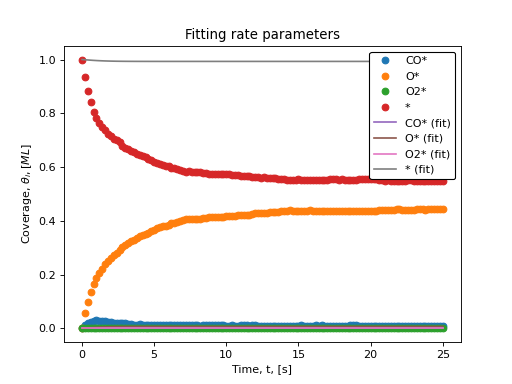

CPU times: user 9.12 s, sys: 612 ms, total: 9.74 s
Wall time: 7.14 s


In [3]:
%%time 
# Options: MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
#Fitting for Model 1: (without CD) #using curve_fit
t2,covg2,fits2 = fit.fitting_rate_param(option='ML',plot=True) 
kfit2 = fit.fitted_k

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: K Nearest Neighbor Regressor:

The Model Mean Squared Errors: 
 [1.59994728e-04 6.62218291e-19 1.35164287e+04 4.17628302e+10
 4.07591491e+09 5.01980884e-05 6.26400082e-01 8.89270322e+04]
50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)


 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [6.15518244e-02 6.91201442e-09 7.24535387e+02 3.69448883e+05
 4.57716988e+05 4.94153024e-02 2.65476057e+00 3.78363259e+02]


<IPython.core.display.Javascript object>


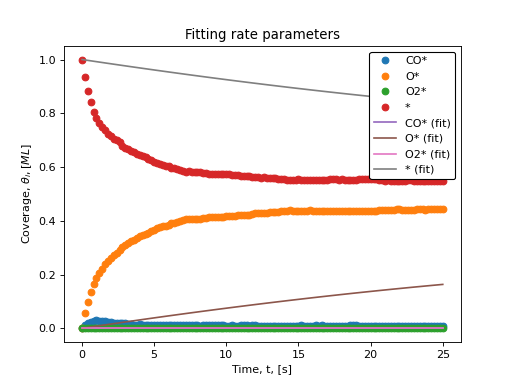

CPU times: user 6.84 s, sys: 347 ms, total: 7.19 s
Wall time: 5.99 s


In [4]:
%%time 
# Options: MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
#Fitting for Model 1: (without CD) #using curve_fit
t3,covg3,fits3 = fit.fitting_rate_param(option='ML',mdl='KNeighborsRegressor',plot=True) 
kfit3 = fit.fitted_k

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: Decision Tree Regressor:

The Model Mean Squared Errors: 
 [7.50000000e-05 6.25000000e-19 7.50000000e+03 2.75000000e+10
 7.50000000e+09 6.25000000e-05 5.69444444e-01 9.23611111e+04]
50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)


 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [7.33333333e-02 8.66666667e-09 7.00000000e+02 1.00000000e+05
 2.00000000e+05 3.00000000e-02 4.00000000e+00 5.33333333e+02]


<IPython.core.display.Javascript object>


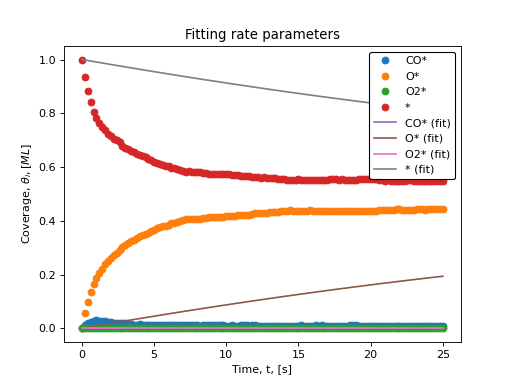

CPU times: user 5.99 s, sys: 23.9 ms, total: 6.02 s
Wall time: 6.02 s


In [5]:
%%time 
# Options: MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
#Fitting for Model 1: (without CD) #using curve_fit
t4,covg4,fits4 = fit.fitting_rate_param(option='ML',mdl='DecisionTreeRegressor',plot=True) 
kfit4 = fit.fitted_k

50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)

--------------------------------------------------
Performing fitting using scikit machine learning algorithms:
--------------------------------------------------
-Using Algorithm: Random Forest Regressor:

The Model Mean Squared Errors: 
 [1.16644679e-04 5.65744839e-19 1.06989056e+04 4.02738365e+10
 4.77621298e+09 5.92934150e-05 3.82441274e-01 7.79703792e+04]
50.0 % of the Input dataset is being extracted for fitting (i.e 125 points are being extracted for fitting)


 Initial guess: 

-> Rate Constants:
 [5.81e-02 6.65e-09 7.69e+02 1.15e+05 2.60e+05 2.14e-02 1.35e+00 5.00e+02]

 Final predictions: 

-> Rate Constants:
 [7.27979606e-02 8.54799803e-09 7.03650000e+02 1.20190000e+05
 2.17640000e+05 3.01760000e-02 3.92310000e+00 5.24204417e+02]


<IPython.core.display.Javascript object>


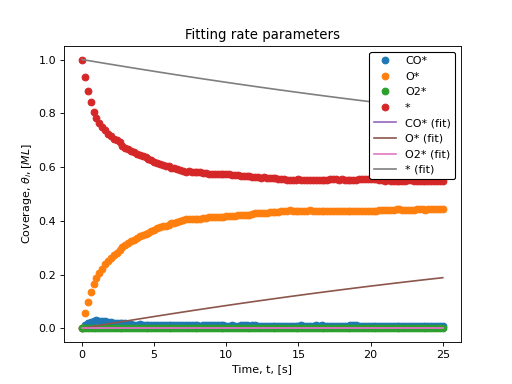

CPU times: user 50.1 s, sys: 402 ms, total: 50.5 s
Wall time: 52 s


In [3]:
%%time 
# Options: MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
#Fitting for Model 1: (without CD) #using curve_fit
t5,covg5,fits5 = fit.fitting_rate_param(option='ML',mdl='RandomForestRegressor',plot=True) 
kfit5 = fit.fitted_k